In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# sns.set_palette("Reds")
# sns.set_style('whitegrid')

### monkey_pmv

In [15]:
df = pd.read_json('/home/diego/storage/projects/generative-glm/experiments/figure3/monkey_pmv/' + 'df_mmd.json')

In [16]:
fr_train = 24

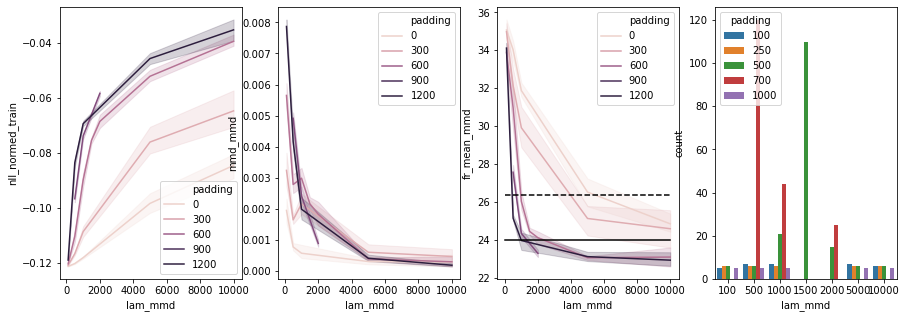

In [18]:
data = df.copy()
data = data[(data.beta1 == 0) & (data.num_epochs == 400) & (data.n_batch_fr == 60)]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(15, 5), ncols=4)
sns.lineplot(x='lam_mmd', y='nll_normed_train', hue='padding', ci=95, data=data, ax=ax1)
sns.lineplot(x='lam_mmd', y='mmd_mmd', hue='padding', ci=95, data=data, ax=ax2)
sns.lineplot(x='lam_mmd', y='fr_mean_mmd', hue='padding', ci=95, data=data, ax=ax3)
sns.countplot(x='lam_mmd', hue='padding', data=data, ax=ax4)
ax3.plot([0, 1e4], [fr_train, fr_train], 'k-')
ax3.plot([0, 1e4], [fr_train * 1.1, fr_train * 1.1], 'k--')

### human_ctx

In [39]:
df = pd.read_json('/home/diego/storage/projects/generative-glm/experiments/figure3/human_ctx/' + 'df_mmd.json')

In [40]:
nll_ml, nll_l2 = -0.1812, -0.12410

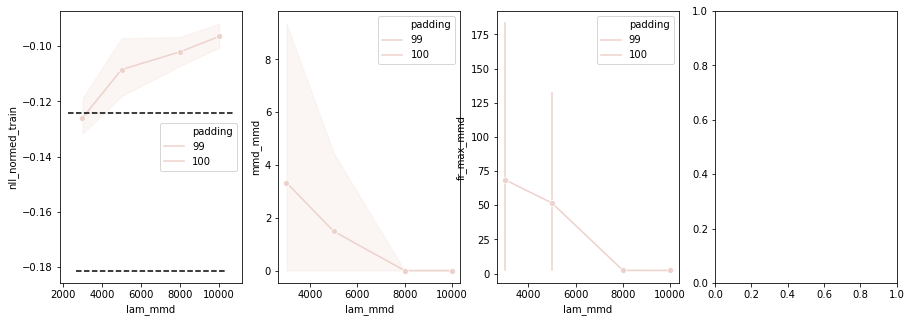

In [42]:
data = df.copy()
# data = data[(data.beta1 == 0) & (data.num_epochs == 450) & (data.n_batch_fr == 40)]
data = data[(data.beta1 == 0) & (data.num_epochs == 600) & (data.n_batch_fr == 25)]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(figsize=(15, 5), ncols=4)
sns.lineplot(x='lam_mmd', y='nll_normed_train', marker='o', hue='padding', ci=95, data=data, ax=ax1)
sns.lineplot(x='lam_mmd', y='mmd_mmd', marker='o', hue='padding', ci=95, data=data, ax=ax2)
sns.lineplot(x='lam_mmd', y='fr_max_mmd', marker='o', hue='padding', err_style='bars', ci=95, data=data, ax=ax3)
# sns.countplot(x='lam_mmd', hue='padding', data=data, ax=ax4)
ax1.plot(ax1.get_xlim(), [nll_ml] * 2, 'k--')
ax1.plot(ax1.get_xlim(), [nll_l2] * 2, 'k--')
# ax3.plot([0, 1e4], [fr_train, fr_train], 'k-')
# ax3.plot([0, 1e4], [fr_train * 1.1, fr_train * 1.1], 'k--')

In [58]:
df[(df['num_epochs'] == 600) & (df['padding'] == 200) & (df['lam_mmd'] == 4e3)].mmd_mmd

12    0.000542
14    0.000710
15    0.000621
16    0.000332
17    0.000302
18    0.000527
19    0.000531
20    2.190652
21    0.000813
22    0.000244
23    0.000337
24    0.000726
25    0.000345
26    0.000282
27    0.000381
28    0.000221
29    0.000724
30    0.000365
31    0.000590
32    0.000393
33    0.000203
Name: mmd_mmd, dtype: float64

In [28]:
df = df.drop(78, axis=0)

In [29]:
df.to_json('/home/diego/storage/projects/generative-glm/experiments/figure3/human_ctx/' + 'df_mmd.json')